In [1]:
from astropy.io import fits
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import convolve, Gaussian1DKernel

# targets-bright-hp-0.fits

Este catalogo contiene más información util para astrometría. No lo usaremos.

In [193]:
archivo_fits = fits.open('targets-bright-hp-0.fits') #open file

In [194]:
archivo_fits.info() #resume el contenido de la tabla

Filename: targets-bright-hp-0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  TARGETS       1 BinTableHDU    296   100859R x 108C   [I, J, 8A, J, 4A, D, E, D, E, 5E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, I, I, E, E, E, E, E, E, E, B, B, I, 15E, 15E, 15E, 15E, 15I, 15I, 15D, 15D, E, E, E, E, E, E, E, E, K, 2A, E, E, E, E, E, E, E, E, L, E, B, E, E, E, E, E, E, 1A, K, K, K, K, D, K, K, K, K]   


In [195]:
archivo_fits[1].header #Asi accedemos al contenido de la tabla. El indice indica a cual fila ingresamos

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  975 / width of table in bytes                        
NAXIS2  =               100859 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                  108 / number of fields in each row                   
TTYPE1  = 'RELEASE '           / label for field   1                            
TFORM1  = 'I       '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'BRICKID '           / label for field   2                            
TFORM2  = 'J       '           / data format of field: 4-byte INTEGER           
TTYPE3  = 'BRICKNAME'       

In [196]:
archivo_fits[1].data['RA'] #Asi seleccionamos uno de los Header mostrados antes

array([46.28759021, 44.24610687, 46.10935661, ..., 39.58888722,
       50.01249468, 50.01292702])

# coadd-sv3-backup-10016.fits
Index of /public/edr/spectro/redux/fuji/healpix/sv3/backup/100/10016/

Este catalogo es el que más nos parece adecuado para buscar y graficar espectros por noches.

In [197]:
archivo_fits = fits.open('coadd-sv3-backup-10016.fits') #open file

In [198]:
archivo_fits.info() #resume el contenido de la tabla

Filename: coadd-sv3-backup-10016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   9R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   16R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 9)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 9)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 9)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 9)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   float64   
  9  R_FLUX        1 Ima

In [199]:
archivo_fits[13].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 2881                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Z_WAVELENGTH'       / extension name                                 
BUNIT   = 'Angstrom'                                                            
CHECKSUM= 'fbUOfZRMfaRMfYRM'   / HDU checksum updated 2022-02-15T22:09:07       
DATASUM = '3106662670'         / data unit checksum updated 2022-02-15T22:09:07 

In [200]:
archivo_fits[13].data

array([7520. , 7520.8, 7521.6, ..., 9822.4, 9823.2, 9824. ])

In [201]:
archivo_fits[14].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2881                                                  
NAXIS2  =                    9                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'Z_FLUX  '           / extension name                                 
BUNIT   = '10**-17 erg/(s cm2 Angstrom)'                                        
CHECKSUM= '2U7a4T5U2T5Z2T5Z'   / HDU checksum updated 2022-02-15T22:09:07       
DATASUM = '2722859522'         / data unit checksum updated 2022-02-15T22:09:07 

In [202]:
archivo_fits[14].data

array([[29.384806  , 26.901798  , 21.927593  , ..., 19.94164   ,
        20.756145  , 15.9839945 ],
       [-0.44302306,  0.21667023, -1.0068816 , ...,  0.8047688 ,
        -2.308117  ,  0.37252367],
       [24.7406    , 24.187798  , 30.598436  , ..., 14.399642  ,
        13.709883  , 10.853569  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.5704736 , -0.9058871 , -0.61248606, ..., -0.1943168 ,
         0.2962273 , -0.99085647],
       [ 9.487678  ,  7.006179  ,  8.452967  , ...,  5.4688406 ,
         3.8125587 ,  4.984337  ]], dtype=float32)

Como se ve en el 'archivo_fits[14].data' aparece una matriz, o lista de listas, en donde cada fila corresponde al flujo de 9 objetos distintos. Esto se describe en las dimensiones dadas por el 'archivo_fits[14].header'. Para graficar uno de los espectros en especifico, hacemos lo siguiente:

In [203]:
archivo_fits[14].data[0]

array([29.384806 , 26.901798 , 21.927593 , ..., 19.94164  , 20.756145 ,
       15.9839945], dtype=float32)

In [204]:
archivo_fits[14].data[1] # y asi hasta 9, dependiendo del objeto del que queramos saber el espectro.

array([-0.44302306,  0.21667023, -1.0068816 , ...,  0.8047688 ,
       -2.308117  ,  0.37252367], dtype=float32)

Graficaremos el flujo con el filtro z contra las longitudes de onda de dicho filtro. En otro ejemplo mostramos que podemos unir todos los filtros para armar el espectro completo del objeto.

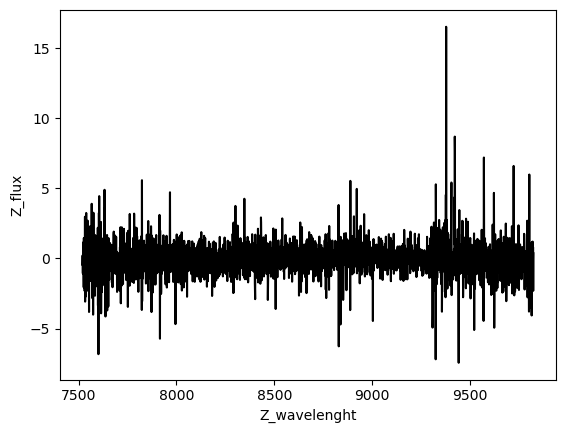

In [205]:
y=archivo_fits[14].data[1]
x=archivo_fits[13].data

plt.figure()
plt.plot(x,y, color='k')
plt.xlabel("Z_wavelenght")
plt.ylabel("Z_flux")
plt.show()

Podemos abrir la información de otra manera y graficar todo el espectro uniendo las mediciones de los tres filtros de color usados:

In [2]:
espc= fits.open('coadd-sv3-backup-10016.fits') 
espc.info()

Filename: coadd-sv3-backup-10016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    197   9R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   16R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU        11   (2751, 9)   float32   
  5  B_IVAR        1 ImageHDU        11   (2751, 9)   float32   
  6  B_MASK        1 ImageHDU        12   (2751, 9)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU        11   (2751, 11, 9)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)   float64   
  9  R_FLUX        1 Ima

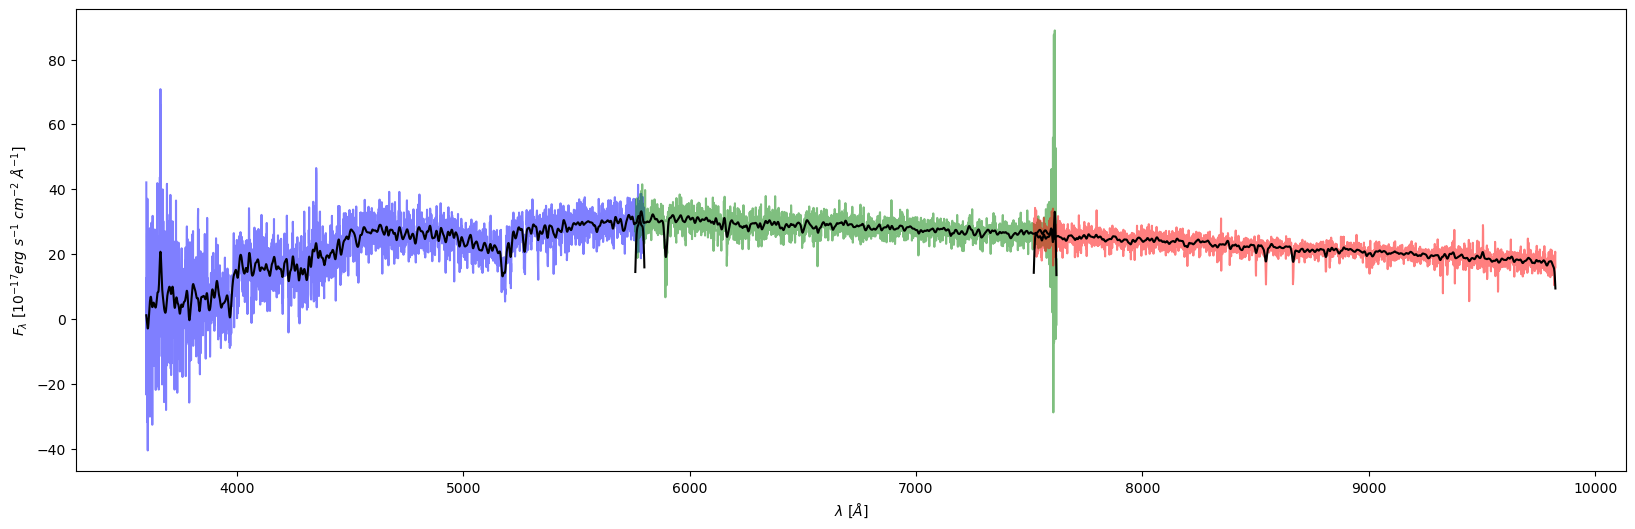

In [3]:
xb=espc[4].data[0]
yb=espc[3].data
xr=espc[9].data[0]
yr=espc[8].data
xz=espc[14].data[0]
yz=espc[13].data



plt.figure(figsize = (20, 6))
# Plot the spectrum from each arm (B,R,Z) in blue, green, red

plt.plot(yb, xb, color = 'b', alpha = 0.5)
plt.plot(yr, xr, color = 'g', alpha = 0.5)
plt.plot(yz, xz, color = 'r', alpha = 0.5)
# Over-plotting smoothed spectra in black for all the three arms
plt.plot(yb, convolve(xb, Gaussian1DKernel(5)), color = 'k')
plt.plot(yr, convolve(xr, Gaussian1DKernel(5)), color = 'k')
plt.plot(yz, convolve(xz, Gaussian1DKernel(5)), color = 'k')
plt.xlabel('$\lambda$ [$\AA$]')
plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
plt.show()

In [4]:
archivo3 = Table.read(espc, hdu=1)
print (archivo3)
print(archivo3.columns)

      TARGETID      COADD_FIBERSTATUS ... MEAN_PSF_TO_FIBER_SPECFLUX
------------------- ----------------- ... --------------------------
2305843019716235906                 0 ...                 0.79392904
 616093919289017142                 0 ...                 0.79434526
2305843019716232322                 0 ...                 0.79443026
 616093919289017218          16777216 ...                 0.79402626
2305843019716236594          16777216 ...                 0.79447687
2305843019716235023                 0 ...                   0.794168
           -3745505               515 ...                        0.0
 616093919289017038                 0 ...                  0.7925254
2305843019716233633              1032 ...                 0.79662114
<TableColumns names=('TARGETID','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','F

# zall-pix-fuji.fits
Index of /public/edr/spectro/redux/fuji/zcatalog/

Este catalogo contiene la clasificación de tipos espectrales, surveys, Healpix, Chi2, RA, DEC

In [206]:
archivo_fits = fits.open('zall-pix-fuji.fits') #open file

In [207]:
archivo_fits.info() #resume el contenido de la tabla

Filename: zall-pix-fuji.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  ZCATALOG      1 BinTableHDU    333   2847435R x 130C   [K, 7A, 6A, J, J, D, D, K, D, 10D, K, 6A, 20A, K, D, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, L, K, L]   


In [208]:
archivo_fits[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  746 / length of dimension 1                          
NAXIS2  =              2847435 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  130 / number of table fields                         
TTYPE1  = 'TARGETID'                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'SURVEY  '                                                            
TFORM2  = '7A      '                                                            
TTYPE3  = 'PROGRAM '        

In [209]:
archivo_fits[1].data['SPECTYPE']

chararray(['GALAXY', 'GALAXY', 'GALAXY', ..., 'QSO', 'GALAXY', 'STAR'],
          dtype='<U6')

In [210]:
Table.read(archivo_fits, hdu=1)

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY
int64,str7,str6,int32,int32,float64,float64,int64,float64,float64[10],int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool
616089230757593610,cmx,other,2152,2152,1.0791710884059862,8.043609933906356e-05,5,8196.955931693316,-31.270945382111947 .. -4.304250468199833,7928,GALAXY,--,10,8.043657064437866,0,23.914121939862518,29.974787585945496,0.0,0.0,0.0,4294967296,4,SKY,0.8476382465505894,63,9010,0240p300,495765,522,--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-0.003990191,0.026369713,0.0027650434,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,--,-1,-1,4294967296,4294967296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.914121939862518,29.974787585945496,4,3600.0,1,1,-0.004,0.008336666,-0.00275,0.009987492,23.914140396147115,0.14040637,29.974777243955057,0.12941206,0.793052,639.917,0.3878204,121.14421,339.00644,2058.3599,832.6921,10.254479,3.4988468,43286.7,93.85132,7782.0195,0.16086136,8970.089,47104.805,28.528677,136.52605,5.594912e-05,293.99265,1.0618171e-05,0.0,13069.495,7.403538e-05,60.08052,135.6212,43926.617,388.23178,7903.1636,339.1673,24097.945,47937.496,98.86368,275.6461,0,False,1,True
39628473202904408,cmx,other,2152,2152,0.18041222201570103,8.931818686229672e-06,0,12949.879635035992,-109.46447587943996 .. 12.118995244141198,7926,GALAXY,--,10,8801.990980923176,0,24.04010479193436,29.813362596941825,0.0,0.0,2020.9597,72057594037929216,1,TGT,0.6306843567905966,7,9010,--,494513,3416,DEV,0.047077972,6.2664,17.88001,40.539513,59.783627,50.919693,533.2463,113.88678,26.52623,-1.0,-1.0,2.5057633,7.149731,16.210651,2.5057633,7.149731,16.210651,0,4.0,0.96060556,-0.2916907,-0.14283308,0,--,0.0,0.0,0.0,0.0,S,3200,1,7205759403792

A continuación graficamos varios espectros utilizando este catalogo: